# AQI Prediction Model using Python

- PM2.5 PM10
- NO, NO2
- NH3 - Ammonia
- CO
- SO2
- 03
- Benzene, Toluene, Xylene

In [98]:
pip install numpy pandas matplotlib seaborn scikit-learn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [100]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [101]:
df = pd.read_csv('air quality data.csv')
df.head() #top 5 rows only

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [102]:
#Shape - Rows and Columns
df.shape

(29531, 16)

In [103]:
#Information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [104]:
#To know if any Duplicate value is present
df.duplicated().sum()

np.int64(0)

In [105]:
#To check missing values
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [106]:
# Drop the rows where 'AQI' has missing values
df.dropna(subset=['AQI'], inplace = True)

In [107]:
df.isnull().sum().sort_values(ascending = False)

Xylene        15372
PM10           7086
NH3            6536
Toluene        5826
Benzene        3535
NOx            1857
O3              807
PM2.5           678
SO2             605
CO              445
NO2             391
NO              387
Date              0
City              0
AQI               0
AQI_Bucket        0
dtype: int64

### Adding Correlation Heatmap (SELF IMPLEMENTATION)
- Identify relationships between pollutants and AQI 
- Potentially guiding feature selection
- Understanding AQI (Air Quality Index) Influencing Factors

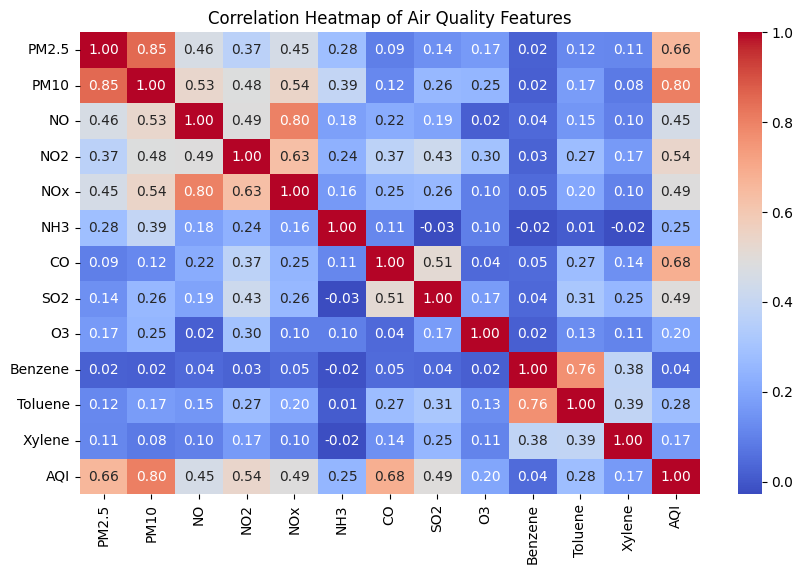

In [108]:
#To add visualisation
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Air Quality Features")
plt.show()

### Adding AQI Category Distribution Plot (SELF IMPLEMENTATION)
- Visualizing Data Distribution
- Comparing AQI Levels if good, bad, or mixed.
- Cross-Checking with Counts making it easier to interpret.

In [109]:
# To Check AQI category counts
print(df['AQI_Bucket'].value_counts())

AQI_Bucket
Moderate        8829
Satisfactory    8224
Poor            2781
Very Poor       2337
Good            1341
Severe          1338
Name: count, dtype: int64


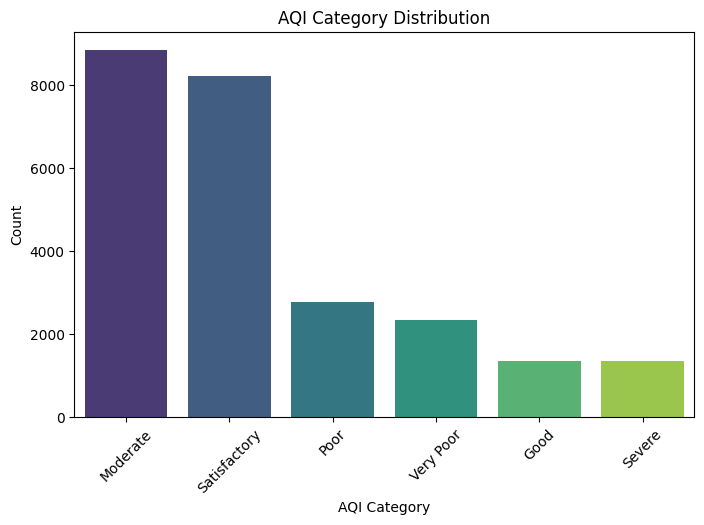

In [110]:
#To Add the following visualization
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='AQI_Bucket', order=df['AQI_Bucket'].value_counts().index, palette="viridis")
plt.xticks(rotation=45)
plt.title("AQI Category Distribution")
plt.xlabel("AQI Category")
plt.ylabel("Count")
plt.show()

In [111]:
df.shape

(24850, 16)

In [112]:
# Summary of statistics in the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24172.0,67.476613,63.075398,0.04,29.0000,48.785,80.9250,914.94
PM10,17764.0,118.454435,89.487976,0.03,56.7775,96.180,150.1825,917.08
NO,24463.0,17.622421,22.421138,0.03,5.6600,9.910,20.0300,390.68
NO2,24459.0,28.978391,24.627054,0.01,11.9400,22.100,38.2400,362.21
NOx,22993.0,32.289012,30.712855,0.00,13.1100,23.680,40.1700,378.24
NH3,18314.0,23.848366,25.875981,0.01,8.9600,16.310,30.3600,352.89
CO,24405.0,2.345267,7.075208,0.00,0.5900,0.930,1.4800,175.81
SO2,24245.0,14.362933,17.428693,0.01,5.7300,9.220,15.1400,186.08
O3,24043.0,34.912885,21.724525,0.01,19.2500,31.250,46.0800,257.73
Benzene,21315.0,3.458668,16.036020,0.00,0.2300,1.290,3.3400,455.03


In [113]:
# Percentage of the null values
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
null_values_percentage

Xylene        61.859155
PM10          28.515091
NH3           26.301811
Toluene       23.444668
Benzene       14.225352
NOx            7.472837
O3             3.247485
PM2.5          2.728370
SO2            2.434608
CO             1.790744
NO2            1.573441
NO             1.557344
Date           0.000000
City           0.000000
AQI            0.000000
AQI_Bucket     0.000000
dtype: float64

#### Key Considerations:
- Xylene has the highest percentage of missing values - 61.86%
- PM10 and NH3 are considerable around 28 - 26 %